# FootballPerformanceAnalysis

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
epl_dataset = '/content/drive/My Drive/Datasets/eplmatches.csv'
data = pd.read_csv(epl_dataset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Calculate win percentages for home, away, and draws for each season
win_counts = data.groupby(['SeasonEndYear', 'FTR']).size().unstack(fill_value=0)

# Calculate win percentages
total_games_per_season = win_counts.sum(axis=1)
home_win_percentage = (win_counts['H'] / total_games_per_season) * 100
away_win_percentage = (win_counts['A'] / total_games_per_season) * 100
draw_percentage = (win_counts['D'] / total_games_per_season) * 100

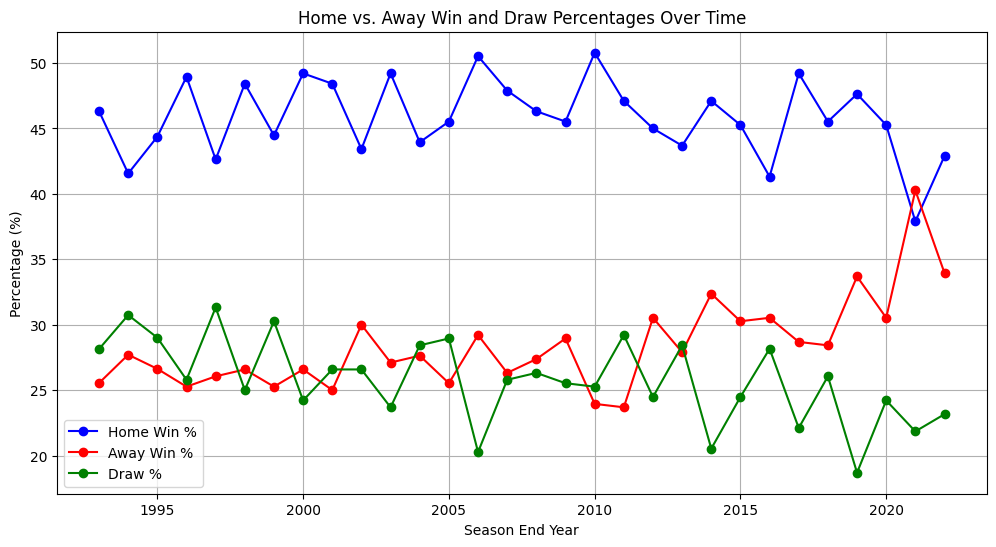

In [ ]:
# Analyze trends over time—are home teams winning less or more?
plt.figure(figsize=(12, 6))
plt.plot(home_win_percentage.index, home_win_percentage, label='Home Win %', color='blue', marker='o')
plt.plot(away_win_percentage.index, away_win_percentage, label='Away Win %', color='red', marker='o')
plt.plot(draw_percentage.index, draw_percentage, label='Draw %', color='green', marker='o')

plt.xlabel('Season End Year')
plt.ylabel('Percentage (%)')
plt.title('Home vs. Away Win and Draw Percentages Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compare average goals scored by home teams vs. away teams
avg_home_goals = data.groupby('SeasonEndYear')['HomeGoals'].mean()
avg_away_goals = data.groupby('SeasonEndYear')['AwayGoals'].mean()

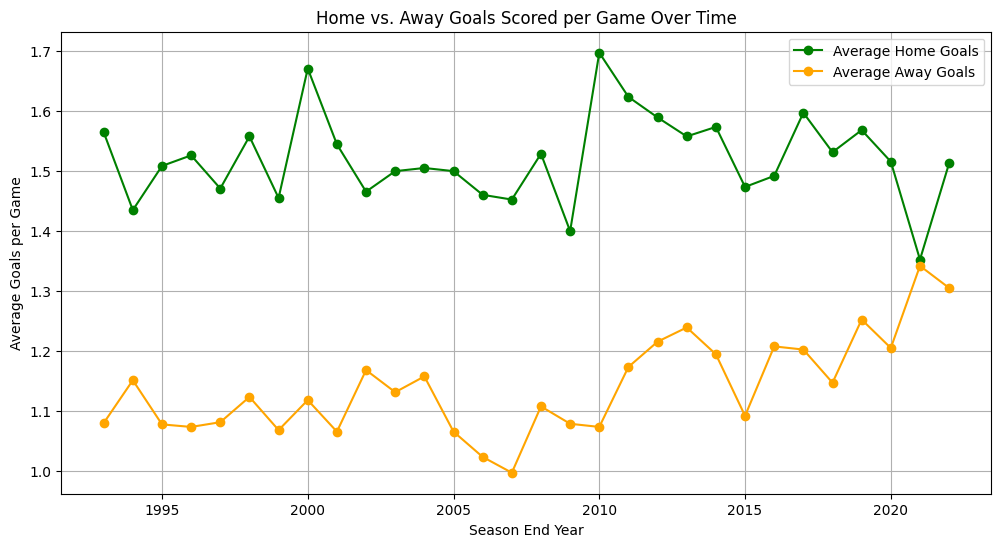

In [ ]:
# Visualize the home advantage trend across seasons (Average Goals)
plt.figure(figsize=(12, 6))
plt.plot(avg_home_goals.index, avg_home_goals, label='Average Home Goals', color='green', marker='o')
plt.plot(avg_away_goals.index, avg_away_goals, label='Average Away Goals', color='orange', marker='o')

plt.xlabel('Season End Year')
plt.ylabel('Average Goals per Game')
plt.title('Home vs. Away Goals Scored per Game Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 5. Perform a t-test to compare home vs. away goals across all seasons
t_stat, p_value = stats.ttest_ind(data['HomeGoals'], data['AwayGoals'])

print(f'T-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

if p_value < 0.05:
    print("There is a significant difference between home and away goals.")
else:
    print("There is no significant difference between home and away goals.")

T-test result: t-statistic = 23.8078, p-value = 0.0000
There is a significant difference between home and away goals.


In [ ]:
# Highlight key seasons with significant changes
home_away_diff = (home_win_percentage - away_win_percentage).abs()
largest_diff_season = home_away_diff.idxmax()
smallest_diff_season = home_away_diff.idxmin()

print(f"Largest home vs away win percentage difference: {largest_diff_season} (Difference: {home_away_diff[largest_diff_season]:.2f}%)")
print(f"Smallest home vs away win percentage difference: {smallest_diff_season} (Difference: {home_away_diff[smallest_diff_season]:.2f}%)")

Largest home vs away win percentage difference: 2010 (Difference: 26.84%)
Smallest home vs away win percentage difference: 2021 (Difference: 2.37%)


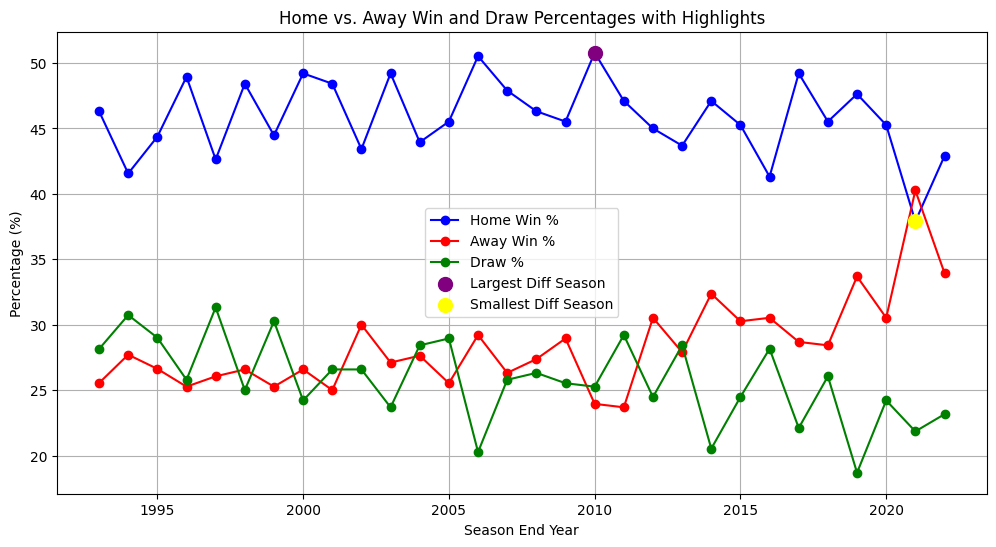

In [ ]:
# Highlight these seasons on the win percentage plot
plt.figure(figsize=(12, 6))
plt.plot(home_win_percentage.index, home_win_percentage, label='Home Win %', color='blue', marker='o')
plt.plot(away_win_percentage.index, away_win_percentage, label='Away Win %', color='red', marker='o')
plt.plot(draw_percentage.index, draw_percentage, label='Draw %', color='green', marker='o')

# Highlighting largest and smallest difference seasons
plt.scatter([largest_diff_season], [home_win_percentage[largest_diff_season]], color='purple', s=100, zorder=5, label='Largest Diff Season')
plt.scatter([smallest_diff_season], [home_win_percentage[smallest_diff_season]], color='yellow', s=100, zorder=5, label='Smallest Diff Season')

plt.xlabel('Season End Year')
plt.ylabel('Percentage (%)')
plt.title('Home vs. Away Win and Draw Percentages with Highlights')
plt.legend()
plt.grid(True)
plt.show()

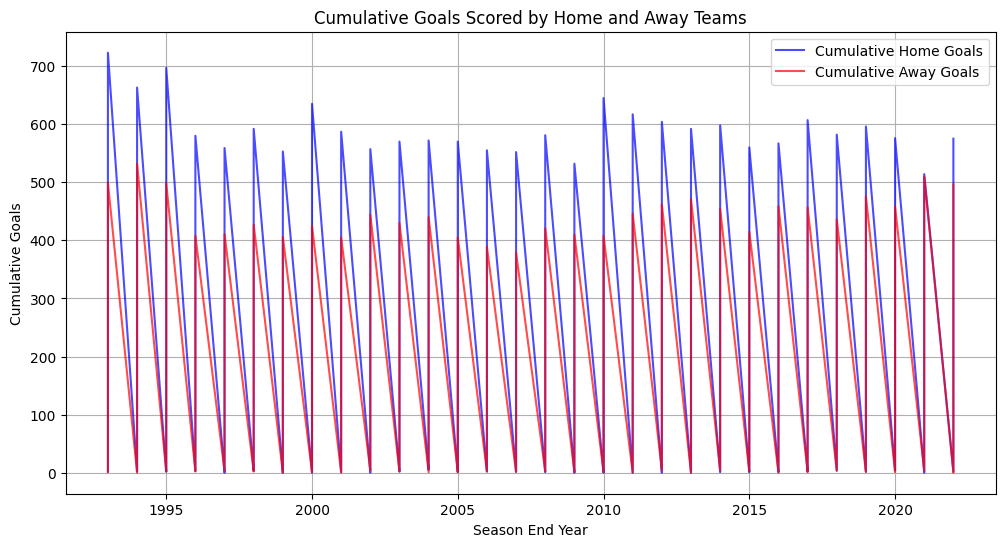

In [ ]:
# Cumulative Goals
data['CumulativeHomeGoals'] = data.groupby('SeasonEndYear')['HomeGoals'].cumsum()
data['CumulativeAwayGoals'] = data.groupby('SeasonEndYear')['AwayGoals'].cumsum()

# Plotting cumulative goals
plt.figure(figsize=(12, 6))
plt.plot(data['SeasonEndYear'], data['CumulativeHomeGoals'], label='Cumulative Home Goals', color='blue', alpha=0.7)
plt.plot(data['SeasonEndYear'], data['CumulativeAwayGoals'], label='Cumulative Away Goals', color='red', alpha=0.7)

plt.xlabel('Season End Year')
plt.ylabel('Cumulative Goals')
plt.title('Cumulative Goals Scored by Home and Away Teams')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate Points based on Full Time Result (FTR)
data['Points'] = data.apply(lambda row: 3 if row['FTR'] == 'H' else (0 if row['FTR'] == 'A' else 1), axis=1)

# Calculate Home Performance
team_performance = data.groupby('HomeTeam').agg(
    HomeWins=('FTR', lambda x: (x == 'H').sum()),
    HomeGoals=('HomeGoals', 'sum'),
    HomePoints=('Points', 'sum'),
    TotalGames_Home=('FTR', 'count')
).reset_index()

# Calculate Away Performance
away_performance = data.groupby('AwayTeam').agg(
    AwayWins=('FTR', lambda x: (x == 'A').sum()),
    AwayGoals=('AwayGoals', 'sum'),
    AwayPoints=('Points', 'sum'),
    TotalGames_Away=('FTR', 'count')
).reset_index()

In [ ]:
# Merge home and away performance
team_performance = pd.merge(
    team_performance,
    away_performance,
    left_on='HomeTeam',
    right_on='AwayTeam',
    suffixes=('_Home', '_Away')
)

# Calculate Total Metrics
team_performance['TotalWins'] = team_performance['HomeWins'] + team_performance['AwayWins']
team_performance['TotalGoals'] = team_performance['HomeGoals'] + team_performance['AwayGoals']
team_performance['TotalPoints'] = team_performance['HomePoints'] + team_performance['AwayPoints']
team_performance['TotalGames'] = team_performance['TotalGames_Home'] + team_performance['TotalGames_Away']
team_performance['WinPercentage'] = (team_performance['TotalWins'] / team_performance['TotalGames'] * 100).fillna(0)

In [ ]:
# Interactive Visualization
fig = px.bar(team_performance, x='HomeTeam',
              y='WinPercentage',
              title='Win Percentage by Team (Home & Away)',
              labels={'HomeTeam': 'Teams', 'WinPercentage': 'Win Percentage (%)'},
              color='TotalPoints',
              hover_data=['TotalGames', 'TotalWins', 'HomeWins', 'AwayWins', 'TotalGoals', 'HomeGoals', 'AwayGoals', 'TotalPoints', 'HomePoints', 'AwayPoints'])

# Adjust layout if necessary
fig.update_layout(barmode='group', height=600)

fig.show()

In [ ]:
# Identify teams with more away wins than home wins
more_away_wins = team_performance[team_performance['AwayWins'] > team_performance['HomeWins']]

# Display the teams with more away wins
if not more_away_wins.empty:
    print("Teams with more away wins than home wins:")
    print(more_away_wins[['HomeTeam', 'AwayWins', 'HomeWins']])
else:
    print("No teams have more away wins than home wins.")

No teams have more away wins than home wins.


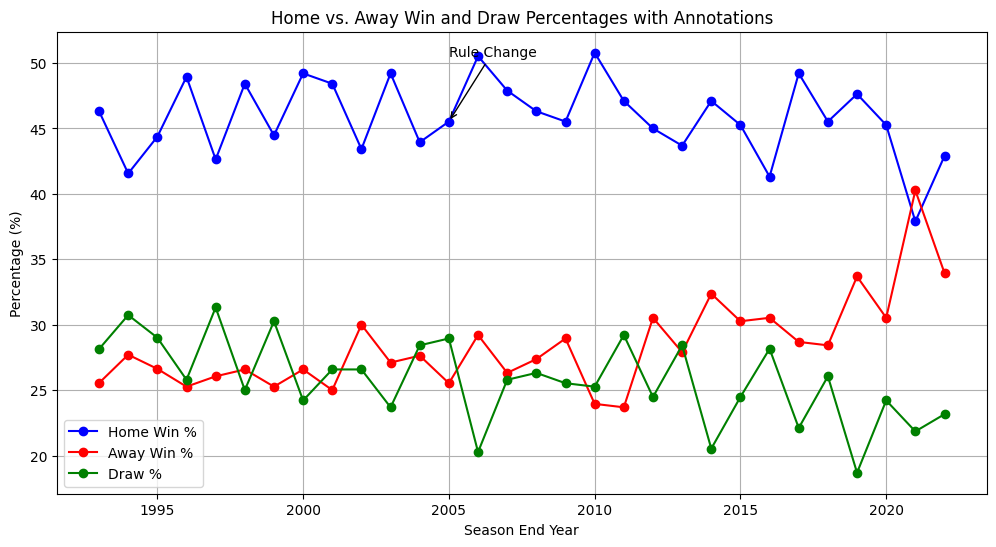

In [ ]:
# Season-Specific Annotations
plt.figure(figsize=(12, 6))
plt.plot(home_win_percentage.index, home_win_percentage, label='Home Win %', color='blue', marker='o')
plt.plot(away_win_percentage.index, away_win_percentage, label='Away Win %', color='red', marker='o')
plt.plot(draw_percentage.index, draw_percentage, label='Draw %', color='green', marker='o')

# Adding annotations for significant seasons
plt.annotate('Rule Change', xy=(2005, home_win_percentage[2005]), xytext=(2005, home_win_percentage[2005]+5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.xlabel('Season End Year')
plt.ylabel('Percentage (%)')
plt.title('Home vs. Away Win and Draw Percentages with Annotations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Analyze Home Win Percentage for Specific Years
# Specify the years of interest
years_of_interest = [1993, 2002, 2012, 2022]

# Initialize a dictionary to store home win percentages for the selected years
home_win_percentages = {}

# Calculate home win percentages for the specified years
for year in years_of_interest:
    if year in win_counts.index:  # Check if the year exists in win_counts
        home_wins = win_counts.loc[year, 'H']
        total_games = win_counts.loc[year].sum()
        # Calculate home win percentage
        home_win_percentage = (home_wins / total_games) * 100 if total_games > 0 else 0
        home_win_percentages[year] = home_win_percentage

# Display the home win percentages for the specified years
home_win_df = pd.DataFrame(list(home_win_percentages.items()), columns=['Year', 'Home Win Percentage'])
print(home_win_df)

# Check for increases from one year to the next
for i in range(len(years_of_interest) - 1):
    year1 = years_of_interest[i]
    year2 = years_of_interest[i + 1]
    if home_win_percentages[year2] > home_win_percentages[year1]:
        print(f"Home win percentage increased from {year1} to {year2}: {home_win_percentages[year1]:.2f}% to {home_win_percentages[year2]:.2f}%")
    else:
        print(f"Home win percentage did not increase from {year1} to {year2}: {home_win_percentages[year1]:.2f}% to {home_win_percentages[year2]:.2f}%")


   Year  Home Win Percentage
0  1993            46.320346
1  2002            43.421053
2  2012            45.000000
3  2022            42.894737
Home win percentage did not increase from 1993 to 2002: 46.32% to 43.42%
Home win percentage increased from 2002 to 2012: 43.42% to 45.00%
Home win percentage did not increase from 2012 to 2022: 45.00% to 42.89%
